EDGE DETECTION

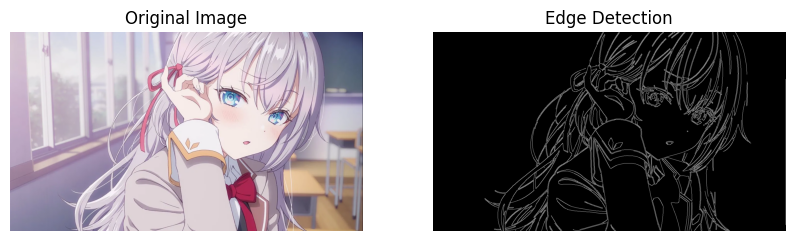

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("C://Users//Akash//Downloads//alya.webp")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
edges = cv2.Canny(blurred_image, threshold1=100, threshold2=200)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()


IMAGE PROJECTION (Perspective Transformation)

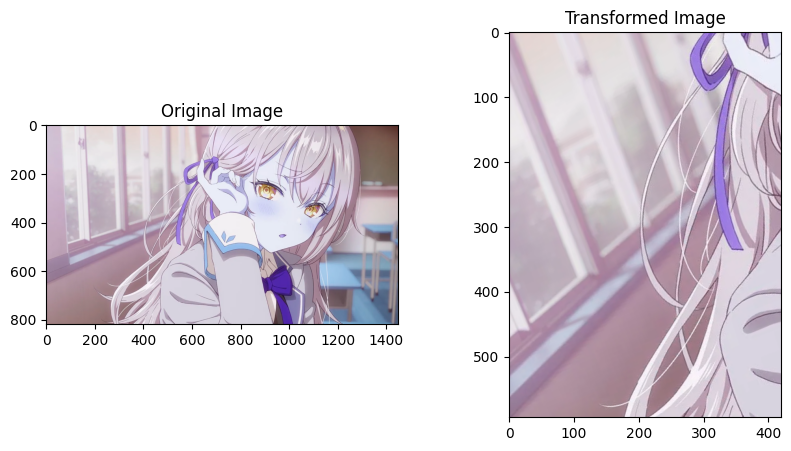

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("C://Users//Akash//Downloads//alya.webp")

src_points = np.float32([[320, 15], [700, 215], [85, 610], [530, 780]])

dst_points = np.float32([[0, 0], [420, 0], [0, 594], [420, 594]])

matrix = cv2.getPerspectiveTransform(src_points, dst_points)

transformed_image = cv2.warpPerspective(image, matrix, (420, 594))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('Transformed Image')
plt.imshow(transformed_image)

plt.show()

DEPTH MAP FROM STEREO PAIR

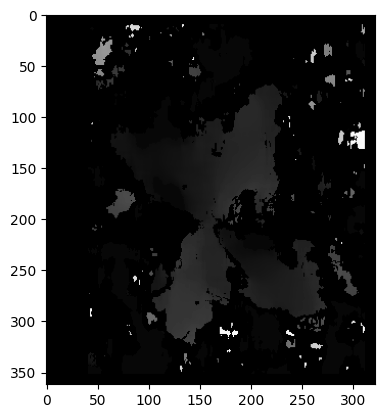

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgL = cv2.imread("C://Users//Akash//Downloads//left.png", cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread("C://Users//Akash//Downloads//right.png", cv2.IMREAD_GRAYSCALE)

stereo = cv2.StereoBM_create(numDisparities=32, blockSize=21)

disparity = stereo.compute(imgL, imgR)

plt.imshow(disparity, 'gray')
plt.show()


3D MODEL FROM STEREO IMAGES

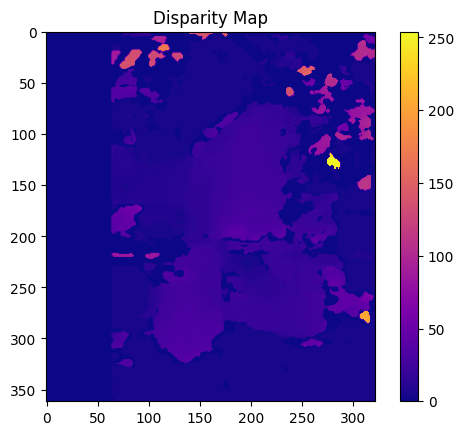

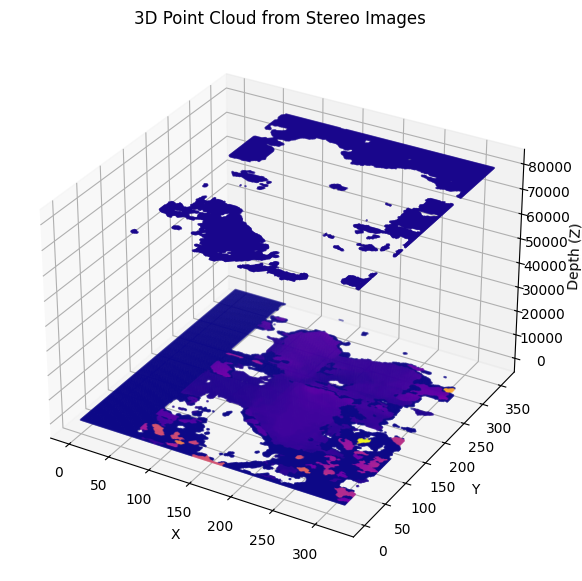

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

img_left = cv2.imread("C://Users//Akash//Downloads//left.png", cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread("C://Users//Akash//Downloads//right.png", cv2.IMREAD_GRAYSCALE)

min_disparity = 0
num_disparities = 64  # Must be divisible by 16
block_size = 9        # Must be an odd number

stereo = cv2.StereoSGBM_create(
    minDisparity=min_disparity,
    numDisparities=num_disparities,
    blockSize=block_size,
    P1=8 * 3 * block_size ** 2,   # Control for smooth disparity map
    P2=32 * 3 * block_size ** 2,  # Control for smooth disparity map
    disp12MaxDiff=1,
    uniquenessRatio=15,
    speckleWindowSize=50,
    speckleRange=2
)

disparity = stereo.compute(img_left, img_right).astype(np.float32) / 16.0

disparity_normalized = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

plt.imshow(disparity_normalized, cmap='plasma')
plt.colorbar()
plt.title("Disparity Map")
plt.show()

focal_length = 0.8 
baseline = 0.1 

depth_map = (focal_length * baseline) / (disparity + 1e-6)

h, w = depth_map.shape
x, y = np.meshgrid(np.arange(w), np.arange(h))

x = x.flatten()
y = y.flatten()
z = depth_map.flatten()
color = disparity_normalized.flatten()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=color, cmap='plasma', marker='.', s=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Depth (Z)')
ax.set_title('3D Point Cloud from Stereo Images')

plt.show()


IMAGE SEGMENTATION

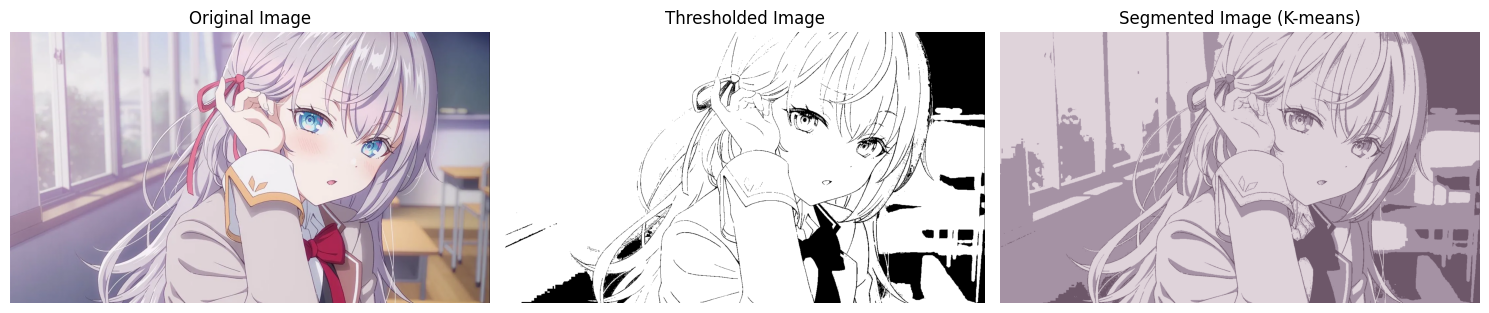

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = "C://Users//Akash//Downloads//alya.webp"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Thresholding for segmentation
threshold_value = 128
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, binary_mask = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

# K-means clustering for segmentation
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_rgb.shape)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Segmented Image (K-means)')
plt.axis('off')

plt.tight_layout()
plt.show()


3D MODEDL FROM DEFOCUSED IMAGE

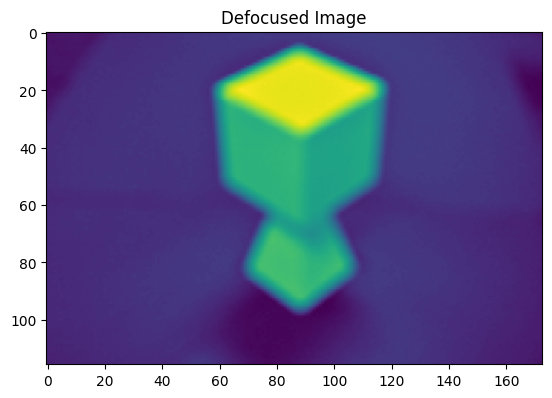

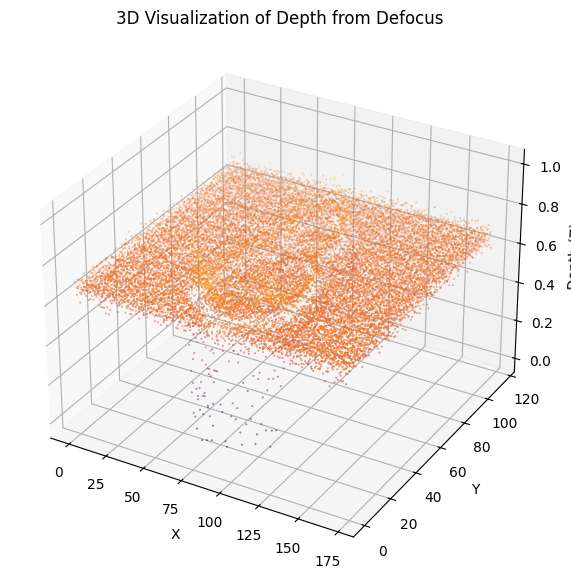

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

image = cv2.imread("C://Users//Akash//Downloads//defocused img.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(image)
plt.title("Defocused Image")
plt.show()

laplacian = cv2.Laplacian(image, cv2.CV_64F)

laplacian_normalized = cv2.normalize(laplacian, None, 0, 1, cv2.NORM_MINMAX)

depth_map = 1 - laplacian_normalized

h, w = depth_map.shape
focal_length = 1.0

x, y = np.meshgrid(np.arange(w), np.arange(h))

x = x.flatten()
y = y.flatten()
z = depth_map.flatten() * focal_length 

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='inferno', marker='.', s=0.5)  # Adjust 's' for point size

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Depth (Z)')
ax.set_title('3D Visualization of Depth from Defocus')

plt.show()


3D MODEL FROM SINGLE IMAGE (Using Edges)

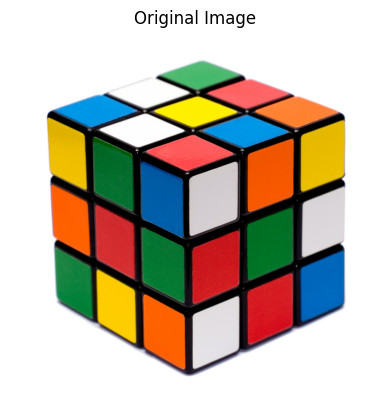

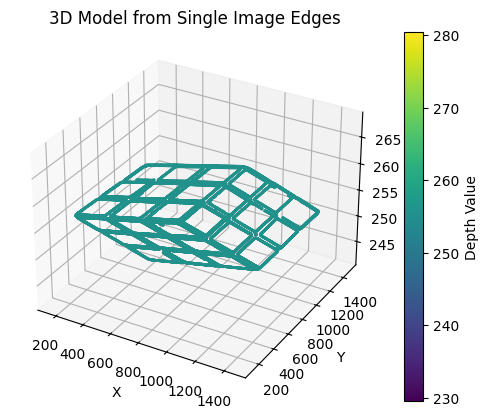

In [ ]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
import cv2 
import numpy as np 
 
image = cv2.imread("C://Users//Akash//Downloads//rubic_cube.jpeg") 

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image') 
plt.axis('off') 
plt.show() 

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
 
edges = cv2.Canny(gray, 50, 150) 

depth_map = edges 
 
rows, cols = np.where(depth_map > 0) 
depth_values = depth_map[depth_map > 0] 
points = np.column_stack((cols, rows, depth_values)) 
 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
 
scatter = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap='viridis', s=1)

cbar = plt.colorbar(scatter)
cbar.set_label('Depth Value')  
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Depth')
ax.set_title('3D Model from Single Image Edges')

plt.show()


OPTICAL FLOW

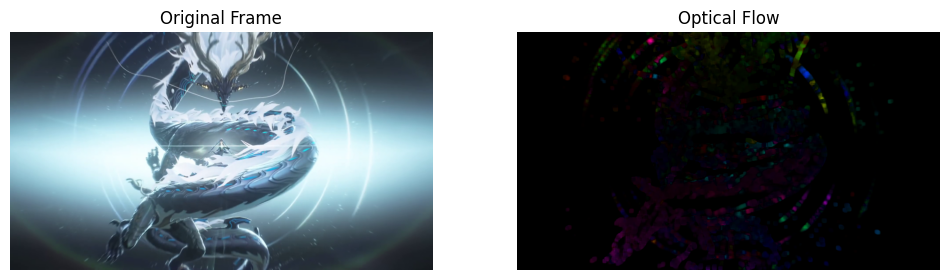

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture("C://Users//Akash//Downloads//jinshi_gacha_animation.mp4")


total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

mid_frame_index = total_frames // 2
cap.set(cv2.CAP_PROP_POS_FRAMES, mid_frame_index)

ret, first_frame = cap.read()

prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
hsv_mask = np.zeros_like(first_frame)
hsv_mask[..., 1] = 255
hsv_mask[..., 0] = angle * 180 / np.pi / 2
hsv_mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

rgb_flow = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Frame")
ax[0].axis("off")
ax[1].imshow(cv2.cvtColor(rgb_flow, cv2.COLOR_BGR2RGB))
ax[1].set_title("Optical Flow")
ax[1].axis("off")
plt.show()

cap.release()


OBJECT DETECTION(Cat) AND TRACKING FROM VIDEO

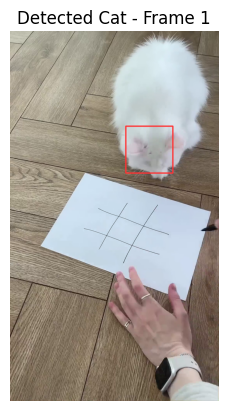

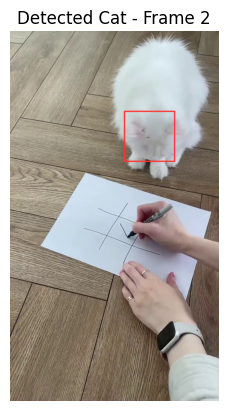

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_frame(frame, title="Frame"):
    # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.title(title)
    plt.axis('off')
    plt.show()

cap = cv2.VideoCapture("C://Users//Akash//Downloads//cat.mp4")

cat_cascade = cv2.CascadeClassifier("C://Users//Akash//Downloads//cascade(cat).xml")

frames_with_cats = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cats = cat_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=9)

    if len(cats) > 0:
        for (x, y, w, h) in cats:
            padding = int(0.2 * max(w, h))
            x = max(0, x - padding)
            y = max(0, y - padding)
            w = min(frame.shape[1], x + w + padding) - x
            h = min(frame.shape[0], y + h + padding) - y

            cv2.rectangle(frame, (x, y), (x + w, y + h), (51, 51, 255), 6)

        frames_with_cats.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    if len(frames_with_cats) >= 2:
        break

cap.release()

for i, frame in enumerate(frames_with_cats):
    show_frame(frame, f"Detected Cat - Frame {i + 1}")

FACE DETECTION

Found 2 faces!


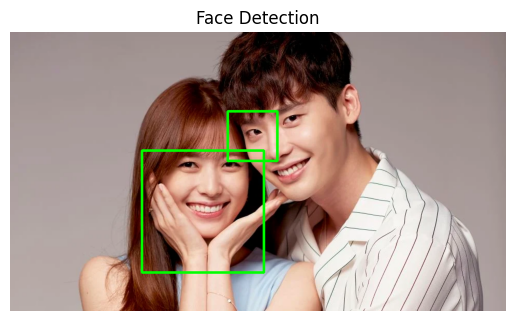

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = "C://Users//Akash//Downloads//W_Two_Worlds_Apart.webp"
cascade_path = "C://Users//Akash//Downloads//haarcascade_frontalface_default.xml"

face_cascade = cv2.CascadeClassifier(cascade_path)

image = cv2.imread(image_path)
if image is None:
    print(f"Error: Unable to load image {image_path}")
    exit()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=12,
    minSize=(50, 50)
)

print(f"Found {len(faces)} faces!")

for (x, y, w, h) in faces:
    padding = 20
    x = max(0, x - padding)
    y = max(0, y - padding)
    w = min(image.shape[1], x + w + 2 * padding) - x
    h = min(image.shape[0], y + h + 2 * padding) - y

    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 4)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Face Detection")
plt.axis('off')
plt.show()